# Reproducing an openEO Experiment published to the EarthCODE Open Science Catalogue

In this guide, we will use your newly published experiment from [previous tutorial](./3_publication.md) and reproduce it. This process will demonstrate how to leverage the openEO federation and EarthCODE tools to reproduce experiments, ensuring transparency and reproducibility in scientific research, reinforcing the principles of Open Science.

:::{note}
In this guide, we will use a link to a testing experiment from a GitHub repository. The links that we use point to the EarthCODE Open Science Catalogue GitHub repository. This link may not work in the future, as it is a test experiment. However, you can use the same steps to reproduce any experiments published to the EarthCODE Open Science Catalogue.
:::

In [1]:
experiment_url = "https://raw.githubusercontent.com/ESA-EarthCODE/open-science-catalog-metadata-testing/c9ad31fd63330818e7895faf10f5104d9a101c01/experiments/cdse_federation_-_variability_map_experiment/process_graph.json"

In [2]:
import rasterio
import matplotlib.pyplot as plt

def visualise_tif(path: str):
    with rasterio.open(path) as src:
        data = src.read(1)  # Read the first band
        plt.figure(figsize=(10, 10))
        plt.imshow(data, cmap='viridis')
        plt.colorbar()
        plt.show()

## Connection with CDSE openEO Federation

The first step, before executing our published experiment in openEO, is to authenticate with an available openEO backend. In this example, we will use the CDSE openEO federation, which provides seamless access to both datasets and processing resources across multiple federated openEO backends.

In [3]:
import openeo

In [4]:
connection = openeo.connect(url="openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


## Using the openEO client
The first option to execute an existing experiment is through the openEO Python client. By using openEO's `datacube_from_json`, you can import the published experiment from the OSC into openEO.

In [5]:
experiment = connection.datacube_from_json(experiment_url)

In [6]:
from IPython.display import JSON

JSON(experiment.to_json())

/Users/bramjanssen/projects/earthcode/examples/.venv/lib/python3.13/site-packages/IPython/core/display.py:636: UserWarning: JSON expects JSONable dict or list, not JSON strings
  warnings.warn("JSON expects JSONable dict or list, not JSON strings")


<IPython.core.display.JSON object>

In [8]:
path =  "./files/varmap_experiment_reproduce.tiff"
experiment.execute_batch(
    path,
    title="CDSE Federation - Variability Map Experiment (reproduce)"
)

0:00:00 Job 'cdse-j-250820073233473abb75de6395ae8af2': send 'start'
0:00:38 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:00:44 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:00:50 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:00:58 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:01:18 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:01:34 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:01:49 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:02:09 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:02:33 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:03:04 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:03:51 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:04:39 Job 'cdse-j-250820073233473abb75de6395ae8af2': queued (progress 0%)
0:05:37 Job 'cdse-j-

<BatchJob job_id='cdse-j-250820073233473abb75de6395ae8af2'>

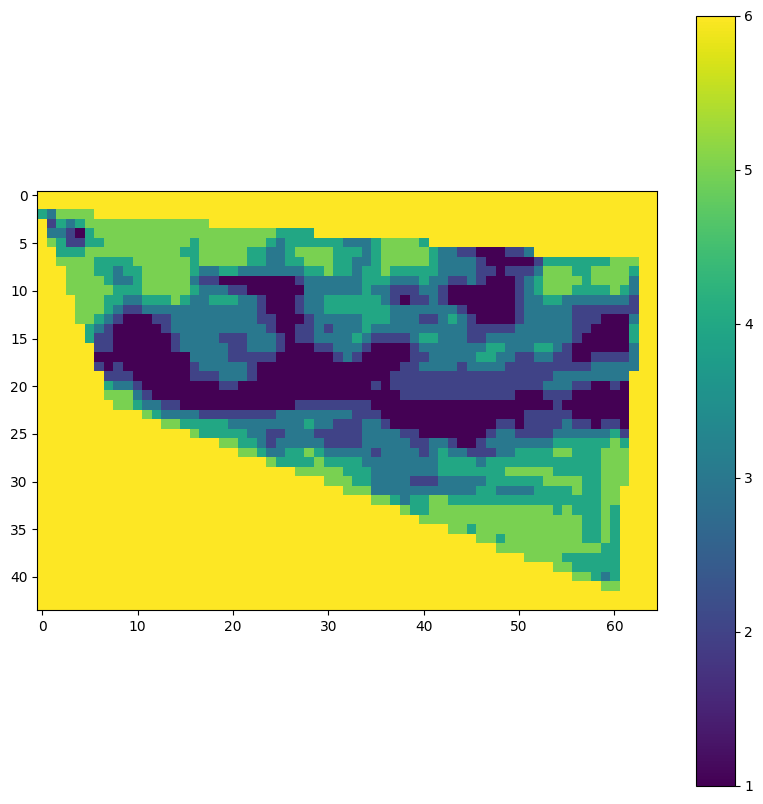

In [9]:
visualise_tif(path)

In this next step we will verify if the output products of the original experiment, created in the [previous tutorial](./2_experiment.ipynb) are the same as the output products of the reproduced experiment. This is done by comparing the output products of the original experiment with the output products of the reproduced experiment.

In [11]:
import numpy as np


def compare_geotiff(file1: str, file2: str) -> bool:
    with rasterio.open(file1) as src1, rasterio.open(file2) as src2:
        # Check if dimensions match
        if src1.width != src2.width or src1.height != src2.height:
            return False
        
        # Check if coordinate reference systems match
        if src1.crs != src2.crs:
            return False
        
        # Check if transform properties match
        if src1.transform != src2.transform:
            return False
        
        # Compare pixel values
        data1 = src1.read()
        data2 = src2.read()
        if not np.array_equal(data1, data2):
            return False

    return True

# Call the function with the specified files
are_equal = compare_geotiff("./files/varmap_experiment.tiff", "./files/varmap_experiment_reproduce.tiff")
print(f"Are the GeoTIFF files equal? {are_equal}")

Are the GeoTIFF files equal? True


### Using the openEO Web Editor


#### Using the experiment URL

Alternatively, you can also open the experiment through the [openEO Web Editor](https://openeofed.dataspace.copernicus.eu) using the experiment URL. This can be done by clicking the **Import process from an external source** button located in the top navigation bar.

![Reproducing Experiment - openEO Web Editor - Import](./images/reproduce_editor_1.png)

Next, you can past the experiment URL into the window to fetch the experiment and open it in the editor.

![Reproducing Experiment - openEO Web Editor - Import Form](./images/reproduce_editor_2.png)

Finally, click the **Create Batch Job** button to initiate the execution of the experiment.

![Reproducing Experiment - openEO Web Editor - Create Batch Job](./images/reproduce_editor_3.png)


### Using the execution link from the published experiment

:::{warning}
This feature is still in development and is not yet fully integrated in the EarthCODE Open Science Catalogue. Therefore, the retrieval of the execution link requires you to access the experiment through GitHub. In future release, this link will be available directly from the EarthCODE Open Science Catalogue.
:::

Whenever an experiment or workflow is published to the EarthCODE Open Science Catalogue, an execution link is generated. This link can be used to execute the experiment or workflow directly in the openEO Web Editor. As the integration of this execution link in the EarthCODE OSC is still in development, for now you can access the execution link through the GitHub repository of the EarthCODE Open Science Catalogue. The execution link is available in the `links` field of the experiment metadata. For example: https://editor.openeo.org/?process=https://raw.githubusercontent.com/ESA-EarthCODE/open-science-catalog-metadata-testing/c9ad31fd63330818e7895faf10f5104d9a101c01/experiments/cdse_federation_-_variability_map_experiment/process_graph.json&server=https://openeofed.dataspace.copernicus.eu/openeo. 

![Reproducing Experiment - Execution Link - GitHub Record](./images/reproduce_link_1.png)

Navigating to this link will open the experiment in the openEO Web Editor, allowing you to execute it directly.


![Reproducing Experiment - Execution Link - openEO Web Editor](./images/reproduce_link_2.png)